In [2]:
import sys
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import config
import plot_cluster_utils as pcu
import seaborn as sns
import SLM_utils as slm
plt.style.use("bmh")
from scipy.special import gamma
from scipy import stats
import figure_utils
from scipy import stats 
import seaborn as sns
from matplotlib.gridspec import GridSpec
from matplotlib import rc
rc('text', usetex=True)
SMALL_SIZE=15
MEDIUM_SIZE=25
rc('legend', fontsize=MEDIUM_SIZE)
rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
rc('ytick', labelsize=MEDIUM_SIZE)  
colors = ['#348ABD', '#A60628', '#7A68A6', '#467821']

In [17]:
24/500

0.048

In [3]:
def sigma_2_xi(Ns,ns_i):
   # Ns = count_reads.sum()
   # ns_i = count_reads.loc[species]
    return(np.mean((ns_i*(ns_i - 1)/(Ns*(Ns-1)))) - np.mean(ns_i/Ns)**2)

In [4]:
count_reads = pd.read_csv("/u/scratch/r/rwolff/merged_MIDAS_output/%s/species/count_reads.txt" % "am",sep="\t",index_col=0)
species = "Bacteroides_vulgatus_57955"
Ns = count_reads.sum()
ns_i = count_reads.loc[species]
np.mean((ns_i*(ns_i - 1)/(Ns*(Ns-1)))) - np.mean(ns_i/Ns)**2

0.008154983948094857

In [5]:
np.var(ns_i/Ns)

0.008202456965440696

In [6]:
means = []
var = []
all_strain_freqs = {}
for h in ["am","an","ao","ae"]:
    count_reads = pd.read_csv("/u/scratch/r/rwolff/merged_MIDAS_output/%s/species/count_reads.txt" % h,sep="\t",index_col=0)
    rel_ab = pd.read_csv("/u/scratch/r/rwolff/merged_MIDAS_output/%s/species/relative_abundance.txt" % h,sep="\t",index_col=0)
    psamps = config.Poyet_samples[h]
    sorted_species = rel_ab[psamps].T.mean().sort_values(ascending=False)
    sorted_species = list(sorted_species[sorted_species > 5*1e-3].index)
    
    Ns = count_reads.sum()

    for i in range(len(sorted_species)):

        species = sorted_species[i]
        strain_total_freqs = pcu.get_strain_total_freqs(species,h)
        
        for strain in strain_total_freqs.columns[:-2]:
            means.append(np.mean(strain_total_freqs[strain]))
            ns_i = strain_total_freqs[strain]*Ns
            var.append(sigma_2_xi(Ns,ns_i))
            all_strain_freqs[(h,species,strain)] = strain_total_freqs[strain]
            #var[h].append(np.var(strain_total_freqs[strain]))

/u/home/r/rwolff/diversity_ecology/scripts/plot_cluster_utils.py:28: RuntimeWarning: invalid value encountered in true_divide
  freqs[list(snp_map[key])[1]].append(np.array(list(snp_map[key])[2]/list(snp_map[key][3])))
/u/home/r/rwolff/diversity_ecology/scripts/plot_cluster_utils.py:191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strain_df["Date_Diffs"][0] = 0.0
/u/home/r/rwolff/diversity_ecology/scripts/plot_cluster_utils.py:238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strain_total_freqs["Date_Diffs"][0] = 0.0
/u/home/r/rwolff/diversity_ecology/scripts/plot_cluster_utils.py:28: RuntimeWarning: invalid value e

/u/home/r/rwolff/diversity_ecology/scripts/plot_cluster_utils.py:28: RuntimeWarning: invalid value encountered in true_divide
  freqs[list(snp_map[key])[1]].append(np.array(list(snp_map[key])[2]/list(snp_map[key][3])))
/u/home/r/rwolff/diversity_ecology/scripts/plot_cluster_utils.py:191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strain_df["Date_Diffs"][0] = 0.0
/u/home/r/rwolff/diversity_ecology/scripts/plot_cluster_utils.py:28: RuntimeWarning: invalid value encountered in true_divide
  freqs[list(snp_map[key])[1]].append(np.array(list(snp_map[key])[2]/list(snp_map[key][3])))
/u/home/r/rwolff/diversity_ecology/scripts/plot_cluster_utils.py:191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

/u/home/r/rwolff/diversity_ecology/scripts/plot_cluster_utils.py:238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strain_total_freqs["Date_Diffs"][0] = 0.0
/u/home/r/rwolff/diversity_ecology/scripts/plot_cluster_utils.py:238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strain_total_freqs["Date_Diffs"][0] = 0.0
/u/home/r/rwolff/diversity_ecology/scripts/plot_cluster_utils.py:238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strain_

/u/home/r/rwolff/diversity_ecology/scripts/plot_cluster_utils.py:238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strain_total_freqs["Date_Diffs"][0] = 0.0
/u/home/r/rwolff/diversity_ecology/scripts/plot_cluster_utils.py:28: RuntimeWarning: invalid value encountered in true_divide
  freqs[list(snp_map[key])[1]].append(np.array(list(snp_map[key])[2]/list(snp_map[key][3])))
/u/home/r/rwolff/diversity_ecology/scripts/plot_cluster_utils.py:191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strain_df["Date_Diffs"][0] = 0.0
/u/home/r/rwolff/diversity_ecology/scripts/plot_cluster_utils.py:238: SettingWithCopyWarning: 
A val

/u/home/r/rwolff/diversity_ecology/scripts/plot_cluster_utils.py:238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strain_total_freqs["Date_Diffs"][0] = 0.0
/u/home/r/rwolff/diversity_ecology/scripts/plot_cluster_utils.py:238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strain_total_freqs["Date_Diffs"][0] = 0.0
/u/home/r/rwolff/diversity_ecology/scripts/plot_cluster_utils.py:238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strain_

In [7]:
varh = np.array(var)
meansh = np.array(means)

In [8]:
model = np.polyfit(np.log(varh),np.log(meansh**2), 1)
#model = np.polyfit( np.log(variances),np.log(means**2), 1)
m,B = model
x = np.linspace(min(np.log(varh)),max(np.log(varh)),1000,endpoint=True)
y_bf = m*x + B

In [9]:
beta = np.exp(B)

In [10]:
beta

3.6442206006223423

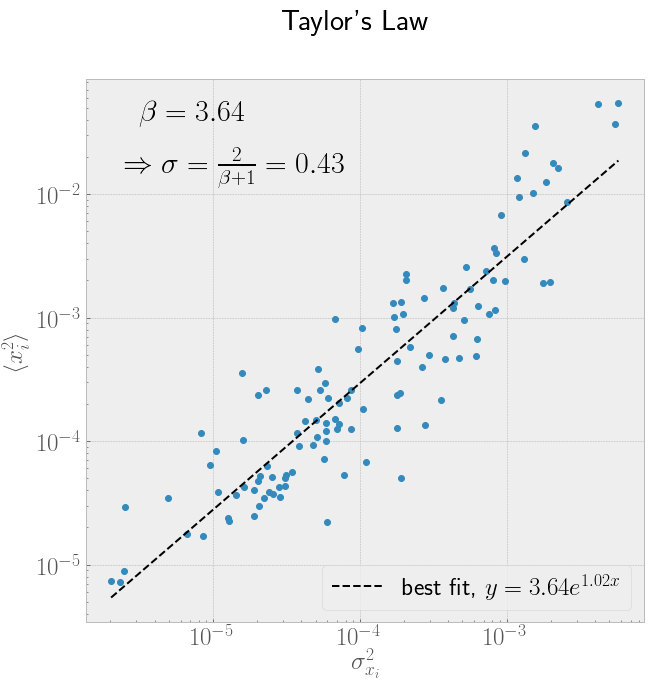

In [11]:
fig,axs = plt.subplots(figsize=(10,10))

fig.suptitle("Taylor's Law",size=30)

axs.loglog(varh, meansh**2,"o")
axs.loglog(np.exp(x),np.exp(y_bf),color='black',label=fr"best fit, $y = {np.around(beta,2)}e^{{{np.around(m,2)}x}}$",
           linestyle="--",linewidth=2)
#axs.loglog(np.exp(x),np.exp(y_TL),color='red',label=r"$y = e^x$",linewidth=2)
axs.legend(loc='lower right')

axs.set_ylabel(r"$\langle x_i^2 \rangle$")
axs.set_xlabel(r"$\sigma_{x_i}^2$")

axs.annotate(fr'$\beta = {np.around(beta,2)}$', size = 30, color="k",
            xy=(.32, .875), xycoords='axes fraction',weight='bold',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')

axs.annotate(fr'$\Rightarrow \sigma = \frac{{2}}{{\beta + 1}} = {np.around(2/(beta+1),2)}$', size = 30, color="k",
            xy=(.5, .76), xycoords='axes fraction',weight='bold',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom');

fig.savefig(f"{config.analysis_directory}/final_paper_figures/Taylorslaw.png")

In [12]:
all_strain_freqs_rescaled = {}
for strain in all_strain_freqs.keys():
    sfreq = all_strain_freqs[strain]
    
    all_strain_freqs_rescaled[strain] = np.array(list((sfreq - np.mean(sfreq))/np.std(sfreq)))

In [13]:
all_ = all_strain_freqs_rescaled.values()
all_joined = []
for elem in all_:
    all_joined.extend(elem)

In [14]:
def gamma_prob(K,sigma,x):
    return 1/gamma(2/sigma - 1)*np.exp(-2*x/(K*sigma))*x**(2/sigma - 2)*(2/(K*sigma))**(2/sigma - 1)

In [15]:
all_strains = []
for strain in all_strain_freqs_rescaled.keys():
    all_strains.append(np.histogram(all_strain_freqs_rescaled[strain],bins=np.linspace(-5,10,17)))

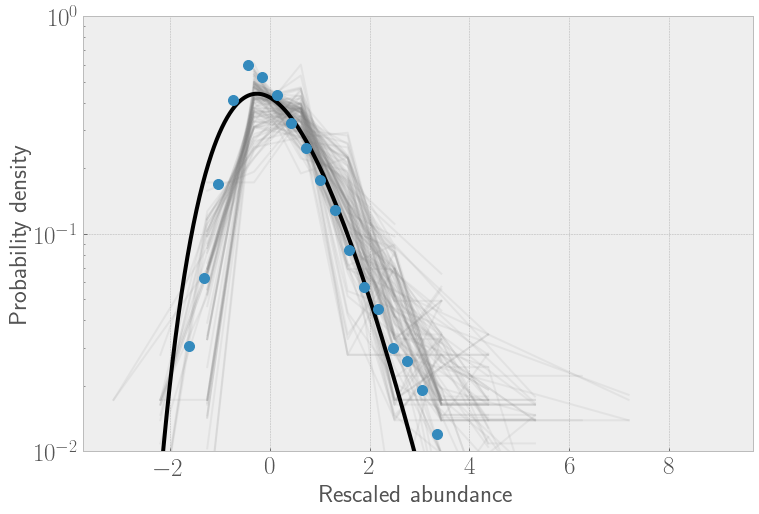

In [16]:

h = plt.hist(all_joined,density=True,bins=40)
plt.close()

fig, ax = plt.subplots(figsize=(12,8))
for strain in all_strains:
    bins = strain[1][1:]
    freqs = strain[0]/sum(strain[0])
    
    bins = bins[freqs > 0]
    freqs = freqs[freqs > 0]
    
    freqs = freqs/sum(freqs)
    ax.plot(bins,freqs,color="grey",alpha=.1)

ax.semilogy()

xrange = np.linspace(-2.5,5,1000)
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(all_joined)
ax.plot(xrange,stats.gamma.pdf(xrange, fit_alpha, fit_loc, fit_beta),color="k",lw=4)

ax.set_ylim([1e-2,1])

ax.set_xlabel("Rescaled abundance",size=25)
ax.set_ylabel("Probability density",size=25)

ax.plot(h[1][1:],h[0],'o',markersize=10)
fig.savefig(f"{config.analysis_directory}/final_paper_figures/gamma_fit.png")

In [67]:
(fit_alpha, fit_loc, fit_beta)

(13.593457401409648, -3.4419882157525112, 0.253208918618426)

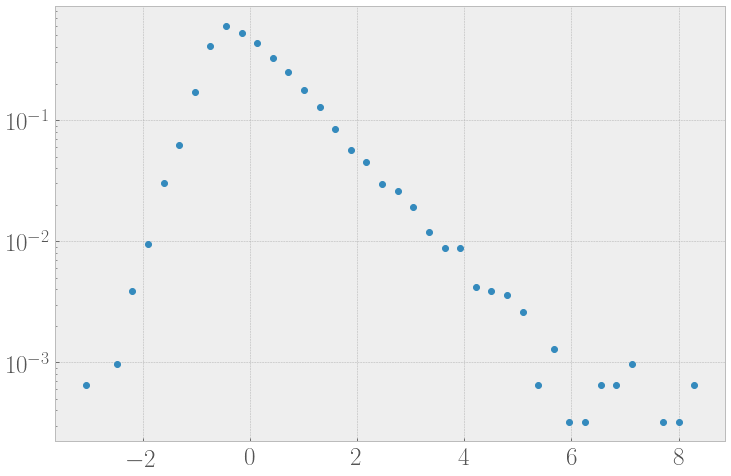

In [48]:
h = plt.hist(all_joined,density=True,bins=40)
plt.close()
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(h[1][1:],h[0],'o')
plt.semilogy()
xrange = np.linspace(-2.5,5,1000)
#plt.plot(xrange,stats.gamma.pdf(xrange, fit_alpha, np.mean(all_joined), fit_beta))

In [53]:
2/sigma

NameError: name 'sigma' is not defined